In [2]:
#IMPORTANDO BIBLIOTECAS
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
#CARREGANDO DATASET
train = pd.read_csv(r"C:\Users\vinicius.perazza\Desktop\PROJETOS\PREFEITURA\base\train.csv")
test = pd.read_csv(r"C:\Users\vinicius.perazza\Desktop\PROJETOS\PREFEITURA\base\test.csv")

In [4]:
#VISUALIZANDO DATASET
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Beane, Mrs. Edward (Ethel Clarke)",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## VERIFICANDO VALORES NULOS

### NULOS PARA A BASE DE TREINO

****************train****************
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


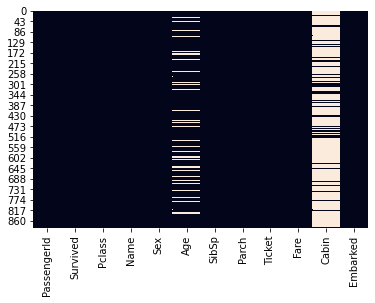

In [6]:
#NULOS PARA BASE DE TREINO
sns.heatmap(train.isnull(), cbar=False)

#VISUALIZANDO QUANTIDADE DE VALORES NULOS
print('****************train****************')
print(pd.isnull(train).sum())

### NULOS PARA A BASE DE TESTE

****************train****************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


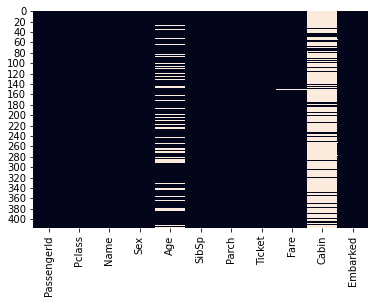

In [7]:
#NULOS PARA BASE DE TREINO
sns.heatmap(test.isnull(), cbar=False)

#VISUALIZANDO QUANTIDADE DE VALORES NULOS
print('****************train****************')
print(pd.isnull(test).sum())

## TRATANDO VALORES NULOS

In [8]:
#transformando sexo em binário.
def transform_binary(value):
    if value == 'male':
        return 0
    else:
        return 1

#aplicando função linha a linha
train['Sex'] = train['Sex'].map(transform_binary)
test['Sex'] = test['Sex'].map(transform_binary)

#null valuables to -1
train['Age'] = train['Age'].fillna(-1)
train['Fare'] = train['Fare'].fillna(-1)
#--
test['Age'] = test['Age'].fillna(-1)
test['Fare'] = test['Fare'].fillna(-1)

#embarked to the top = S
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

# DATA VISUALIZATION

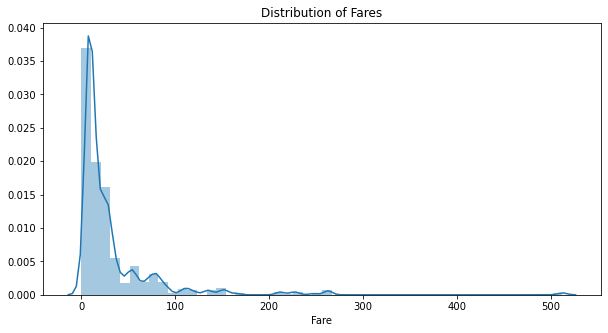

In [8]:
plt.figure(figsize=(10, 5))
sns.distplot(train.Fare)
plt.title('Distribution of Fares')
plt.show()

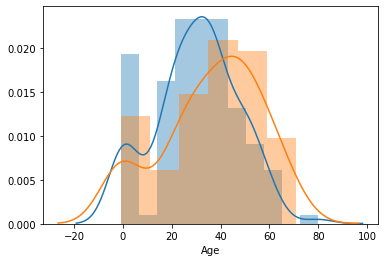

In [9]:
ax = sns.distplot(train[train['Survived']==1].dropna()['Age'])
ay = sns.distplot(train[train['Survived']==0].dropna()['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

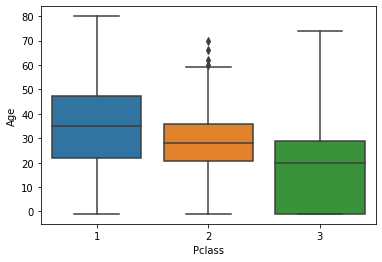

In [10]:
sns.boxplot(x='Pclass',y='Age',data=train)

# CORRELAÇÃO DE PEARSON 

In [11]:
train.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.0,-0.005,-0.035,-0.043,0.038,-0.058,-0.0017,0.013
Survived,-0.005,1.0,-0.34,0.54,0.012,-0.035,0.082,0.26
Pclass,-0.035,-0.34,1.0,-0.13,-0.36,0.083,0.018,-0.55
Sex,-0.043,0.54,-0.13,1.0,-0.023,0.11,0.25,0.18
Age,0.038,0.012,-0.36,-0.023,1.0,-0.18,-0.045,0.14
SibSp,-0.058,-0.035,0.083,0.11,-0.18,1.0,0.41,0.16
Parch,-0.0017,0.082,0.018,0.25,-0.045,0.41,1.0,0.22
Fare,0.013,0.26,-0.55,0.18,0.14,0.16,0.22,1.0


# PAIRPLOT

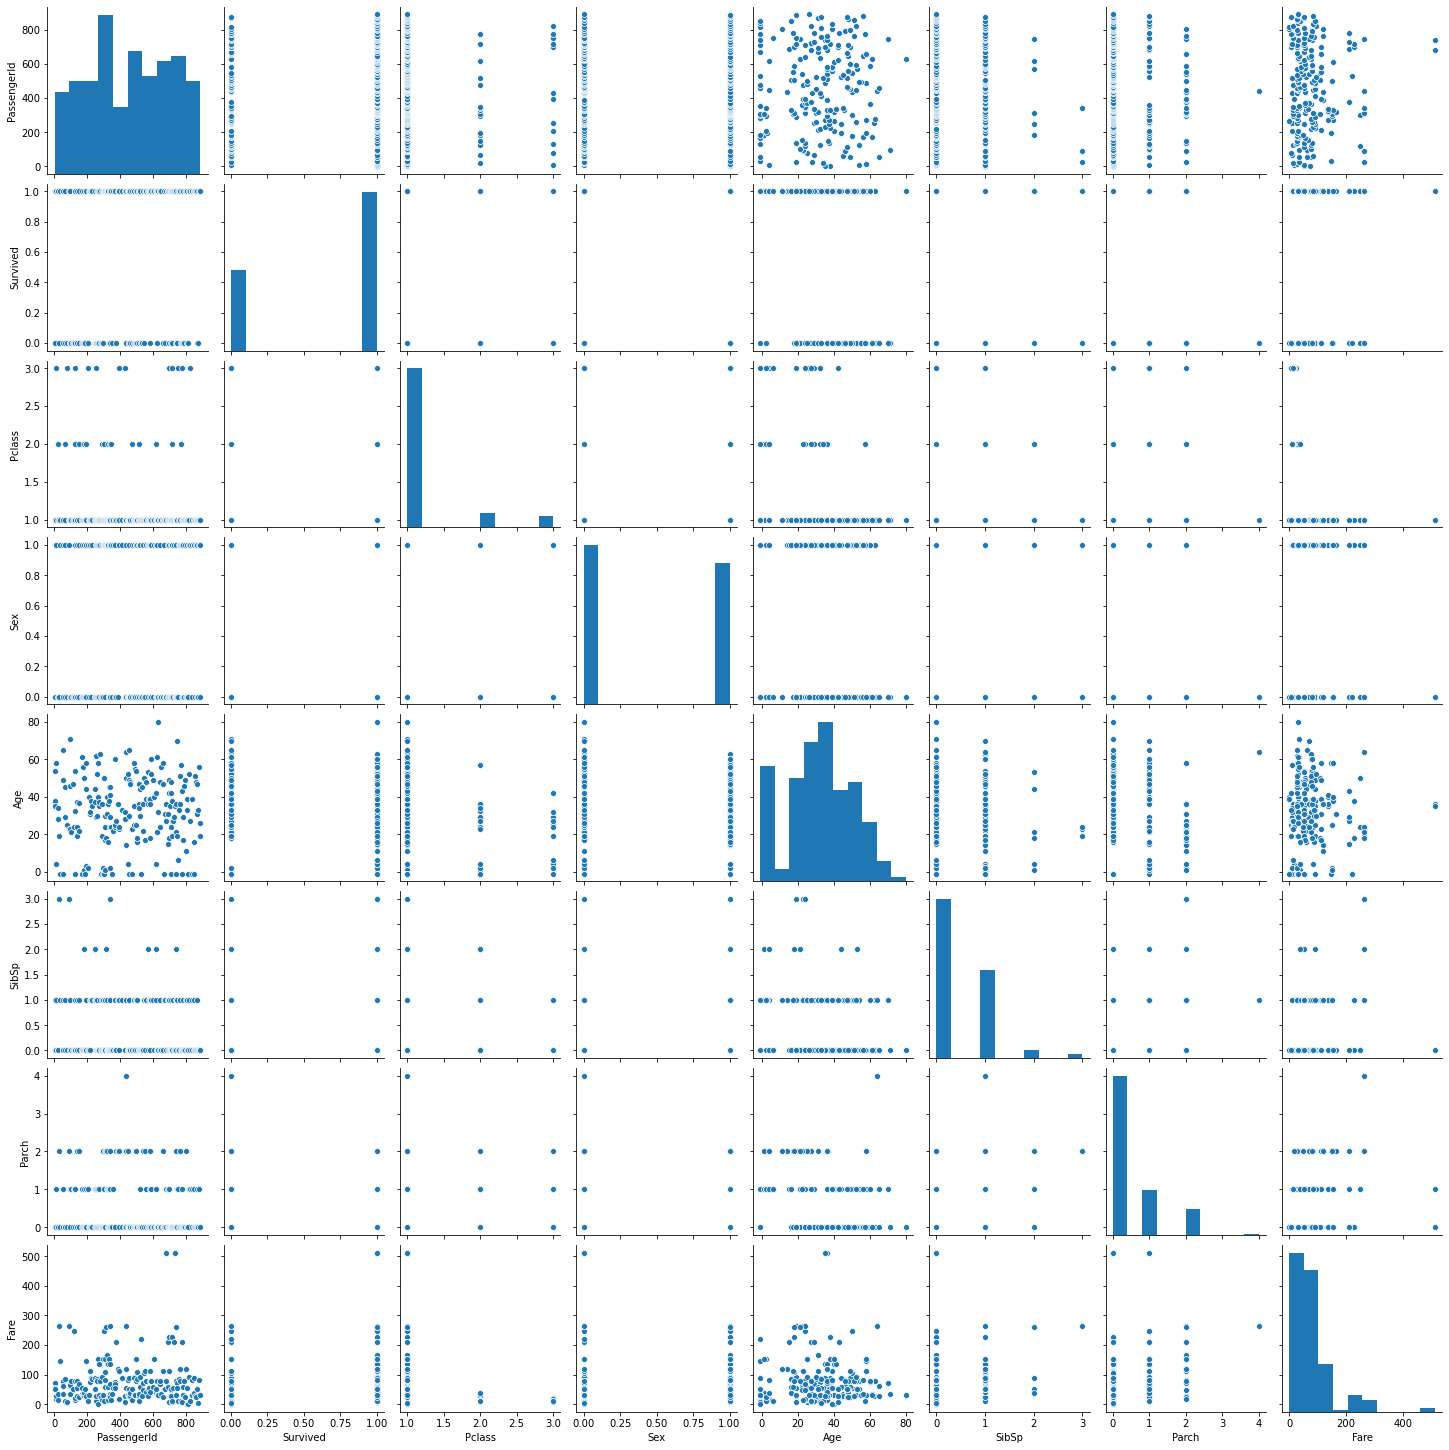

In [12]:
dataset = train
dataset = dataset.dropna()
sns.pairplot(dataset)
plt.show()

# ESCOLHENDO O MODELO


In [ ]:
#VARIAVEL DE AFERIÇÃO
y = train["Survived"]

#VARIAVEL DE MANIPULAÇÃO
features = ["Pclass", "Sex", "SibSp", "Parch", "Age","Fare"]
X = pd.get_dummies(train[features])
np.random.seed(0)

## BACKWARD ELIMINATION

In [13]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)

#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const     2.640384e-23
Pclass    5.278340e-15
Sex       1.144289e-64
SibSp     2.798698e-03
Parch     6.050053e-01
Age       7.755334e-04
Fare      1.824595e-01
dtype: float64

## MODEL ARRAY

In [14]:
#ARRAY COM OS MODELOS
models = []

#models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
#models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
#models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))


### MODELING

In [17]:
#ARRAY COM AS BASES DE TREINO E TESTE

#VARIAVEL DE AFERIÇÃO
y = train["Survived"]

#VARIAVEL DE MANIPULAÇÃO
features = ["Pclass", "Sex", "SibSp", "Age","Fare"]
X = pd.get_dummies(train[features])

for name, model in models:
    model.fit(X, y)

    #score treinamento
    train_score = model.score(X, y) # model accuracy
    
    print({"score treino": train_score}, {"model": model})

{'score treino': 0.6879910213243546} {'model': SVC()}
{'score treino': 0.7991021324354658} {'model': KNeighborsClassifier()}
{'score treino': 0.9809203142536476} {'model': DecisionTreeClassifier()}
{'score treino': 0.9809203142536476} {'model': RandomForestClassifier()}


## LEARNING CURVE

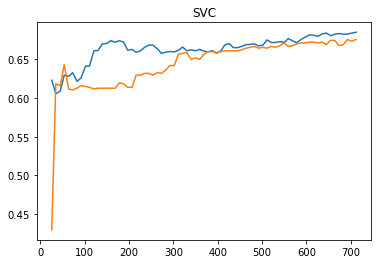

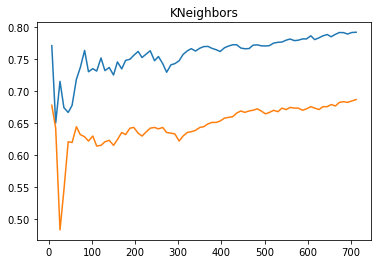

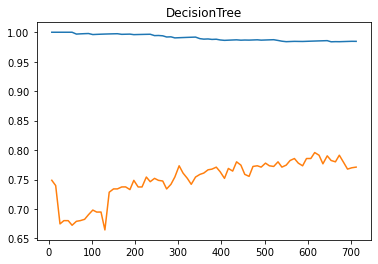

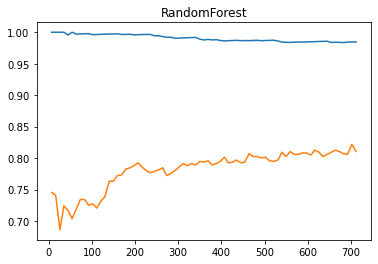

In [15]:
for name, model in models:
    #LEARNING CURVES
    train_sizes, train_scores, test_scores = learning_curve(model, X,y, n_jobs=-1,train_sizes = np.linspace(0.01 , 1, 75))
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    #PLOTING
    plt.plot(train_sizes, train_mean)
    plt.plot(train_sizes, test_mean)
    plt.title(name)
    plt.show()

# RANDOM FOREST

In [25]:
#Splitando a base para teste e treino

#variavel de aferição
y = train["Survived"]

#variaveis de manipulação
features = ["Pclass", "Sex", "SibSp", "Parch", "Age","Fare"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [26]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=1)

In [27]:
predict = model.predict(X_test)

In [33]:
sub = pd.Series(predict, index=test["PassengerId"])

In [34]:
sub

PassengerId
892     0
893     0
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Length: 418, dtype: int64

In [30]:
sub.to_csv("output.csv", header = True)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,-1.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,-1.0,0,0,359309,8.0500,NaN,S
